In [1]:
%matplotlib inline
from scipy import signal 
from scipy.io import wavfile
import IPython.display as ipyd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fs = 16000
N = 2*fs
n = np.arange(N)
f0 = 440
x = np.sin(2*np.pi*(f0/fs)*n)
ipyd.Audio(rate=fs, data=x)

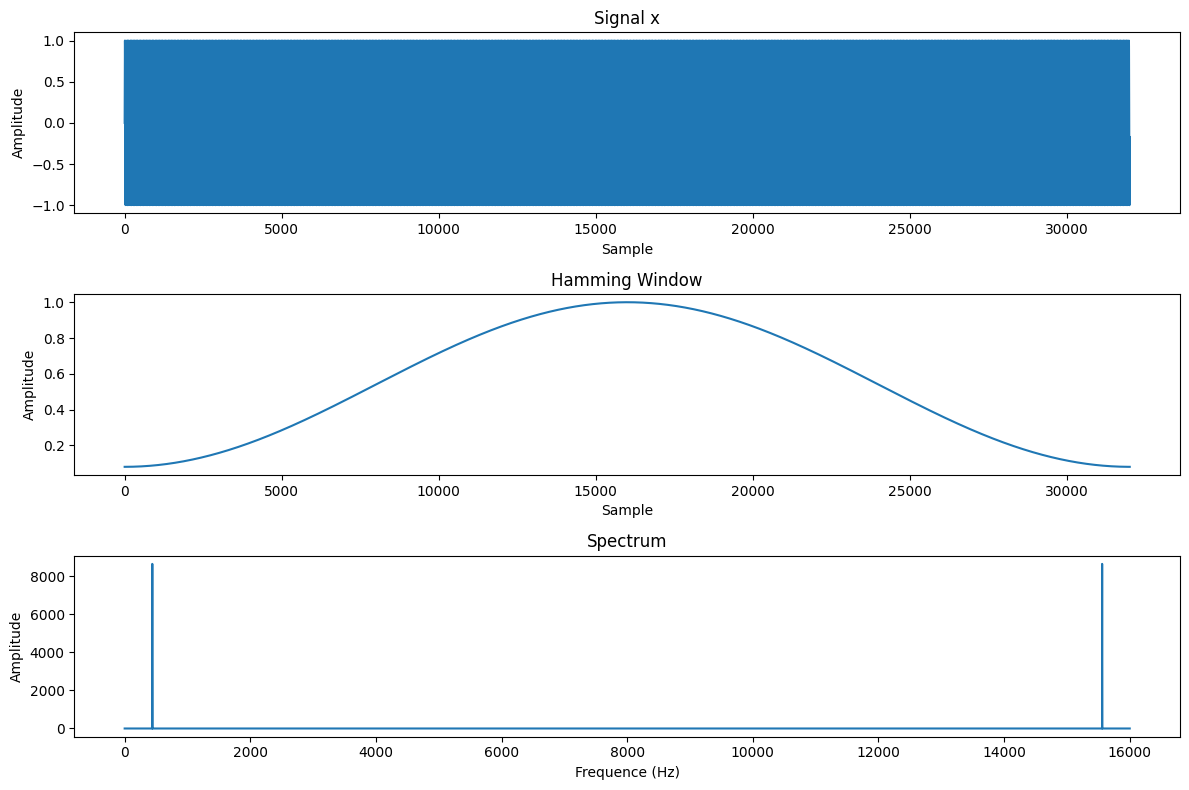

In [3]:
# Plot Spectrum
N = len(x) # 32000
w = np.hamming(N)
X = np.fft.fft(x * w)
freq = np.linspace(0,fs*(N-1)/N, N)

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(x)
plt.title("Signal x")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.subplot(3, 1, 2)
plt.plot(w)
plt.title("Hamming Window")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.subplot(3, 1, 3)
plt.plot(freq,np.abs(X))
plt.title("Spectrum")
plt.ylabel("Amplitude")
plt.xlabel("Frequence (Hz)")

plt.tight_layout()
plt.show()


In [4]:
fn = "chord-F.wav"
fs, x = wavfile.read(fn)
ipyd.Audio(rate=fs,data=x)

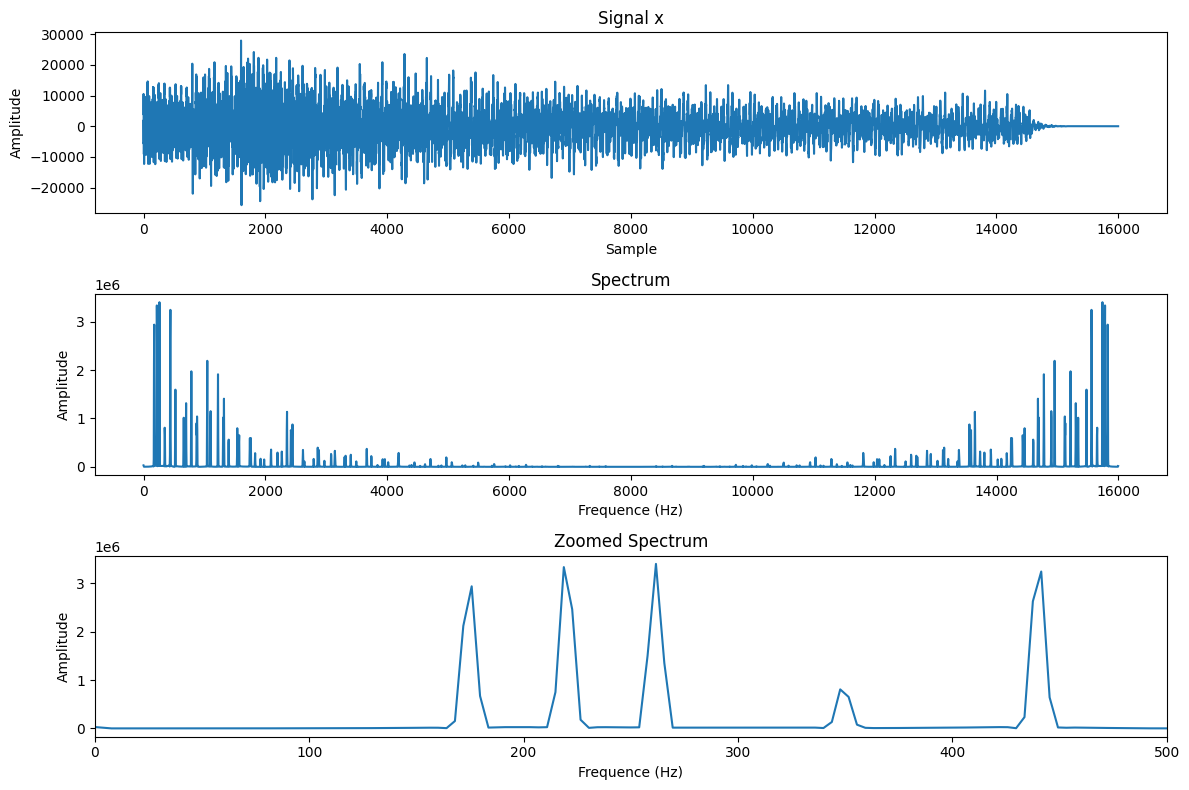

In [5]:
#Plot Spectrum
x1 = x[4096:4096*2]
N = len(x1)
w = np.hamming(N)
X = np.fft.fft(x1*w)
freq = np.linspace(0,fs*(N-1)/N, N)


plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(x)
plt.title("Signal x")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

plt.subplot(3, 1, 2)
plt.plot(freq,np.abs(X))
plt.title("Spectrum")
plt.ylabel("Amplitude")
plt.xlabel("Frequence (Hz)")

plt.subplot(3, 1, 3)
plt.plot(freq,np.abs(X))
plt.title("Zoomed Spectrum")
plt.ylabel("Amplitude")
plt.xlabel("Frequence (Hz)")
plt.xlim([0,500])

plt.tight_layout()
plt.show()

(0.0, 4000.0)

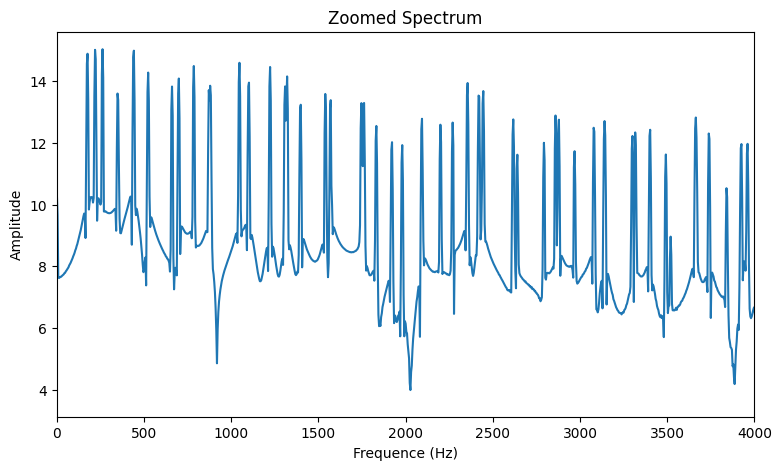

In [6]:
# log amplitude
plt.figure(figsize=(9,5))
plt.plot(freq,np.log(np.abs(X)))
plt.title("Zoomed Spectrum")
plt.ylabel("Amplitude")
plt.xlabel("Frequence (Hz)")
plt.xlim([0,4000])

Text(0.5, 0, 'Time (s)')

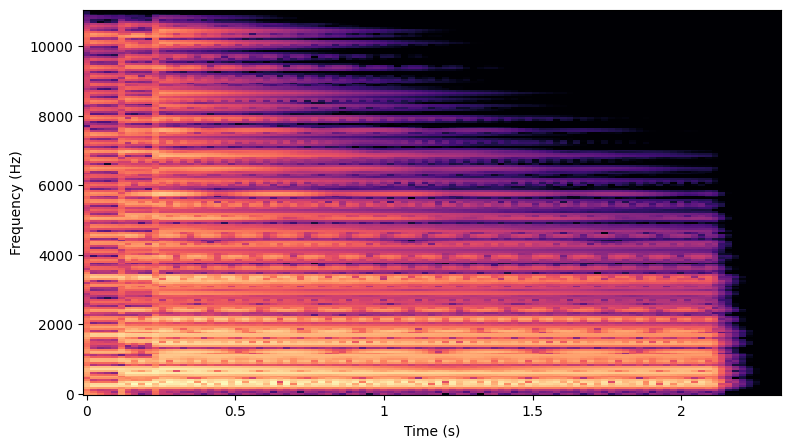

In [15]:
#Short-time Fourier Transform
n_fft = int(0.025*fs) #25ms
hop_length = int(0.010*fs) #10ms
x = x.astype(np.float32)
stft = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)
abs_stft = np.abs(stft)

fig,ax = plt.subplots(figsize=(9,5))
librosa.display.specshow(
    librosa.amplitude_to_db(abs_stft,ref=np.max),
    y_axis='hz',
    x_axis='time',
    ax =ax,
    fmax= 6000,
)
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")

In [17]:
#Mel-Scale Spectrogram
def hz_to_mel(f):
    return 2595*np.log10(1 + f/700) # frequency on Mel scale

def mel_to_hz(mel):
    return 700*(10**(mel/2595.0)-1) # frequency on linear scale

In [18]:
f0 = 300
x = np.sin(2*np.pi*(f0/fs)*n)
print("{:.2f} Hz = {:.2f} Mel".format(f0,hz_to_mel(f0)))
ipyd.Audio(rate=fs, data=x)

300.00 Hz = 401.97 Mel


In [19]:
f0 = 310
x = np.sin(2*np.pi*(f0/fs)*n)
print("{:.2f} Hz = {:.2f} Mel".format(f0,hz_to_mel(f0)))
ipyd.Audio(rate=fs, data=x)

310.00 Hz = 413.18 Mel


In [21]:
f0 = 2000
x = np.sin(2*np.pi*(f0/fs)*n)
print("{:.2f} Hz = {:.2f} Mel".format(f0,hz_to_mel(f0)))
ipyd.Audio(rate=fs, data=x)

2000.00 Hz = 1521.36 Mel


In [22]:
f0 = 2010
x = np.sin(2*np.pi*(f0/fs)*n)
print("{:.2f} Hz = {:.2f} Mel".format(f0,hz_to_mel(f0)))
ipyd.Audio(rate=fs, data=x)

2010.00 Hz = 1525.53 Mel


Text(0.5, 0, 'Frequency(Hz)')

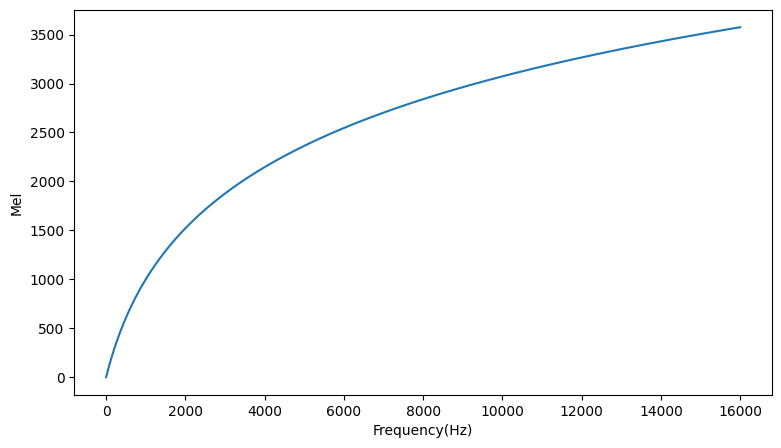

In [23]:
#Plot the mel scale
f = np.linspace(0,16000,1000)
mel = hz_to_mel(f)
plt.figure(figsize=(9,5))
plt.plot(f,mel)
plt.ylabel("Mel")
plt.xlabel("Frequency(Hz)")

In [ ]:
#Filterbanks
